<a href="https://colab.research.google.com/github/mmuchsin/mmuchsin/blob/main/submission_ml_pemula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projek Akhir : Klasifikasi Gambar**

## **Identitas**



*   Nama  : M Muchsin
*   Email : m.muchsin21@gmail.com



## **Data Collecting**

In [ ]:
#unduh data mentah
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /tmp/rockpaperscissors.zip

--2021-06-26 14:07:03--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  3.86MB/s    in 45s     

2021-06-26 14:07:50 (6.81 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
#ektraksi data
!unzip /tmp/rockpaperscissors.zip -d /tmp/

Streaming output truncated to the last 5000 lines.
  inflating: /tmp/rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: /tmp/__MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: /tmp/rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: /tmp/__MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: /tmp/rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: /tmp/__MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: /tmp/rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: /tmp/__MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: /tmp/rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: /tmp/__MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: /tmp/rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: /tmp/__MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: /tmp/rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  

In [ ]:
#hapus file yang tidak diperlukan
!rm -rf /tmp/__MACOSX/
!rm -rf /tmp/rockpaperscissors/rps-cv-images

## **Import Libraries**

In [ ]:
!pip install humanfriendly

     |████████████████████████████████| 92kB 5.9MB/s 


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from google.colab import files
from time import time
from humanfriendly import format_timespan

## **Data Preproccessing**

### **Preprocessing Training Dataset**

In [ ]:
#augmentasi training_dataset
training_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range=90,
                                   horizontal_flip = True,
                                   vertical_flip=True,
                                   fill_mode="nearest",
                                   validation_split=0.4)

training_dataset = training_datagen.flow_from_directory('/tmp/rockpaperscissors',
                                                 target_size = (64, 64),         
                                                 batch_size = 32,                
                                                 subset='training',
                                                 class_mode = 'categorical')

Found 1314 images belonging to 3 classes.


### **Preprocessing Validation Dataset**

In [ ]:
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split=0.4)

validation_dataset = validation_datagen.flow_from_directory('/tmp/rockpaperscissors',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 subset='validation',
                                                 class_mode = 'categorical')

Found 874 images belonging to 3 classes.


## **Membuat Model Dengan Arsitektur CNN**

In [ ]:
model = tf.keras.models.Sequential()

### **Convolution 1**

In [ ]:
model.add(
    tf.keras.layers.Conv2D(
        filters=32,               
        kernel_size=3,            
        activation='relu',
        input_shape=[64, 64, 3]
        )
    )

model.add(
    tf.keras.layers.MaxPool2D(
        pool_size=2,
        strides=2
        )
    )

### **Convolution 2** 

In [ ]:
model.add(
    tf.keras.layers.Conv2D(
        filters=32,
        kernel_size=3,
        activation='relu'
        )
    )

model.add(
    tf.keras.layers.MaxPool2D(
        pool_size=2,
        strides=2
        )
    )

### **Convolution 3**

In [ ]:
model.add(
    tf.keras.layers.Conv2D(
        filters=64,
        kernel_size=3,
        activation='relu'
        )
    )

model.add(
    tf.keras.layers.MaxPool2D(
        pool_size=2,
        strides=2
        )
    )

### **Convolution 4**

In [ ]:
model.add(
    tf.keras.layers.Conv2D(
        filters=128,
        kernel_size=3,
        activation='relu'
        )
    )

model.add(
    tf.keras.layers.MaxPool2D(
        pool_size=2,
        strides=2
        )
    )

### **Flattening**

In [ ]:
model.add(
    tf.keras.layers.Flatten()
    )

### **Hidden layer**

In [ ]:
#full connection
model.add(
    tf.keras.layers.Dense(
        units=128,
        activation='relu'
        )
    )

model.add(
    tf.keras.layers.Dense(
        units=512,
        activation='relu'
        )
    )

In [ ]:
#output
model.add(                   
    tf.keras.layers.Dense(
        units=3,
        activation='softmax'
        )
    )

## **Training Model**

### **Compiling**

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
    )

### **Training**

In [ ]:
start = time()

a = model.fit(
    x = training_dataset,
    validation_data = validation_dataset,
    epochs = 25)

waktu_training = time()- start
print(f'Total waktu training: {format_timespan(waktu_training)}')

Epoch 1/25
42/42 [==============================] - 13s 292ms/step - loss: 1.0035 - accuracy: 0.4490 - val_loss: 1.2651 - val_accuracy: 0.5618
Epoch 2/25
42/42 [==============================] - 12s 283ms/step - loss: 0.7259 - accuracy: 0.6720 - val_loss: 0.6611 - val_accuracy: 0.7403
Epoch 3/25
42/42 [==============================] - 12s 285ms/step - loss: 0.5233 - accuracy: 0.7778 - val_loss: 0.4681 - val_accuracy: 0.7998
Epoch 4/25
42/42 [==============================] - 12s 288ms/step - loss: 0.4675 - accuracy: 0.8067 - val_loss: 0.4678 - val_accuracy: 0.8307
Epoch 5/25
42/42 [==============================] - 12s 287ms/step - loss: 0.3937 - accuracy: 0.8463 - val_loss: 0.4551 - val_accuracy: 0.8307
Epoch 6/25
42/42 [==============================] - 12s 284ms/step - loss: 0.3163 - accuracy: 0.8813 - val_loss: 0.3474 - val_accuracy: 0.8844
Epoch 7/25
42/42 [==============================] - 12s 284ms/step - loss: 0.2510 - accuracy: 0.9125 - val_loss: 0.1618 - val_accuracy: 0.9439

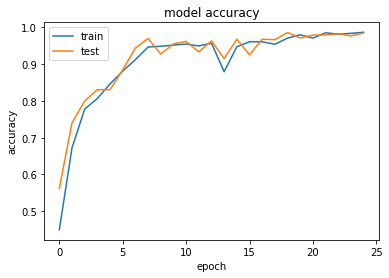

In [ ]:
#histori akurasi
plt.plot(a.history['accuracy'])
plt.plot(a.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **Percobaan Prediksi Upload Gambar**

Saving p1.png to p1.png
p1.png
[[1. 0. 0.]] -- Paper


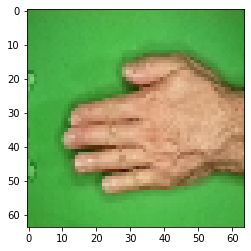

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  
  path = fn
  img = image.load_img(path, target_size=(64,64))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  
  print(fn)
  if round(classes[0][0])==1:
    print(f'{classes} -- Paper')
  elif round(classes[0][1])==1:
    print(f'{classes} -- Rock')
  else:
    print(f'{classes} -- Scissor')

Saving r2.png to r2.png
r2.png
[[0. 1. 0.]] -- Rock


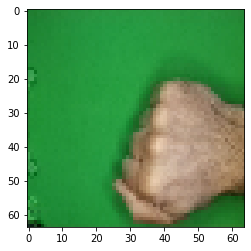

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  
  path = fn
  img = image.load_img(path, target_size=(64,64))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  
  print(fn)
  if round(classes[0][0])==1:
    print(f'{classes} -- Paper')
  elif round(classes[0][1])==1:
    print(f'{classes} -- Rock')
  else:
    print(f'{classes} -- Scissor')

Saving s1.png to s1.png
s1.png
[[0. 0. 1.]] -- Scissor


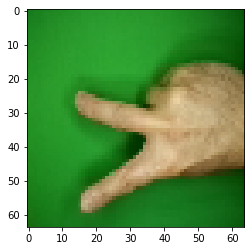

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  
  path = fn
  img = image.load_img(path, target_size=(64,64))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  
  print(fn)
  if round(classes[0][0])==1:
    print(f'{classes} -- Paper')
  elif round(classes[0][1])==1:
    print(f'{classes} -- Rock')
  else:
    print(f'{classes} -- Scissor')